In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import pandas as pd           
import seaborn as sns        
import sklearn 
from sklearn.metrics import confusion_matrix

# Video Game Sales

Этот набор данных содержит список видеоигр с продажами более 100 000 копий, а также оценки критиков и пользователей.

Cтолбцы (признаки) имеют имена:

* `Name` - Название игры.  
* `Platform` - Платформа выпуска игр.    
* `Year_of_Release` - Год выхода игры.    
* `Genre` - Жанр игры.    
* `Publisher` - Издатель игры. 
* `NA_Sales` - Продажи в Северной Америке (в миллионах).
* `EU_Sales` - Продажи в Европе (в миллионах).  
* `JP_Sales` - Продажи в Японии (в миллионах).  
* `Other_Sales` - Продажи в остальном мире (в миллионах).  
* `Global_Sales` - Общий объем продаж по всему миру (в миллионах).  
* `Critic_Score` - общая оценка, составленная сотрудниками Metacritic.  
* `Critic_Count` - количество критиков, оценивших игру.  
* `User_Score` - Оценка подписчиков Metacritic.  
* `User_Count` - Количество пользователей, которые дали оценку.  
* `Rating` - рейтинги ESRB (Entertainment Software Rating Board).    
  
  - «EC» («Early childhood») — «Для детей младшего возраста».  
  - «E» («Everyone») — «Для всех».  
      - Первоначально «K-A» («Kids to Adults»)
  - «E10+» («Everyone 10 and older») — «Для всех от 10 лет и старше».
  - «T» («Teen») — «Подросткам».
  - «M» («Mature») — «Для взрослых».
  - «AO» («Adults Only 18+») — «Только для взрослых».  
  - «RP» («Rating Pending») — «Рейтинг ожидается».
  
    
Задача: предсказать признак `Genre` по остальным признакам.

### Загрузка данных

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/sergeisarynin/ML-course/master/Video_Game_Sales_as_of_Jan_2017.csv')
df.shape

(17416, 15)

In [3]:
df.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.54,76.0,51.0,8.0,324.0,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.80,3.79,3.29,35.57,82.0,73.0,8.3,712.0,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.95,3.28,2.95,32.78,80.0,73.0,8.0,193.0,E
4,Pokemon Red/Pokemon Blue,G,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN


In [4]:
df.index

RangeIndex(start=0, stop=17416, step=1)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17416 entries, 0 to 17415
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             17416 non-null  object 
 1   Platform         17416 non-null  object 
 2   Year_of_Release  17408 non-null  float64
 3   Genre            17416 non-null  object 
 4   Publisher        17415 non-null  object 
 5   NA_Sales         17416 non-null  float64
 6   EU_Sales         17416 non-null  float64
 7   JP_Sales         17416 non-null  float64
 8   Other_Sales      17416 non-null  float64
 9   Global_Sales     17416 non-null  float64
 10  Critic_Score     8336 non-null   float64
 11  Critic_Count     8336 non-null   float64
 12  User_Score       7798 non-null   float64
 13  User_Count       7798 non-null   float64
 14  Rating           10252 non-null  object 
dtypes: float64(10), object(5)
memory usage: 2.0+ MB


Столбцы `Name`, `Genre`, `Rating`, `Platform`, `Publisher` содержат категориальные значения и имеют тип object. Заменим тип на специальный, предназначенный для хранения категориальных значений, кроме столбца `Name`, который можно удалить:

In [6]:
df['Genre'] = df['Genre'].astype('category')

In [7]:
df['Genre'].dtype

CategoricalDtype(categories=['Action', 'Adventure', 'Fighting', 'Misc', 'Platform',
                  'Puzzle', 'Racing', 'Role-Playing', 'Shooter', 'Simulation',
                  'Sports', 'Strategy'],
                 ordered=False)

In [8]:
df['Rating'] = df['Rating'].astype('category')

In [9]:
df['Rating'].dtype

CategoricalDtype(categories=['AO', 'E', 'E10+', 'EC', 'K-A', 'M', 'RP', 'T'], ordered=False)

In [10]:
df['Platform'] = df['Platform'].astype('category')

In [11]:
df['Platform'].dtype

CategoricalDtype(categories=['2600', '3DO', '3DS', 'DC', 'DS', 'G', 'GBA', 'GC', 'GEN',
                  'GG', 'N64', 'NES', 'NG', 'PC', 'PCFX', 'PS', 'PS2', 'PS3',
                  'PS4', 'PSP', 'PSV', 'SAT', 'SCD', 'SNES', 'TG16', 'WS',
                  'Wii', 'WiiU', 'X', 'X360', 'XOne'],
                 ordered=False)

In [12]:
df['Publisher'] = df['Publisher'].astype('category')

In [13]:
df['Publisher'].dtype

CategoricalDtype(categories=['10TACLE Studios', '1C Company',
                  '20th Century Fox Video Games', '2D Boy', '3 O'Clock', '3DO',
                  '49Games', '505 Games', '506 Games', '5p',
                  ...
                  'bitComposer Games', 'dramatic create', 'fonfun', 'honeybee',
                  'iWin', 'id Software', 'imageepoch Inc.',
                  'inXile Entertainment', 'mixi, Inc', 'responDESIGN'],
                 ordered=False)

In [14]:
df['Publisher'].unique()

[Nintendo, Microsoft Game Studios, Take-Two Interactive, Sony Computer Entertainment, Activision, ..., SystemSoft, Milkstone Studios, Dimple Entertainment, Firefly Studios, Team Meat]
Length: 628
Categories (627, object): [Nintendo, Microsoft Game Studios, Take-Two Interactive, Sony Computer Entertainment, ..., Milkstone Studios, Dimple Entertainment, Firefly Studios, Team Meat]

### Обработка выбросов

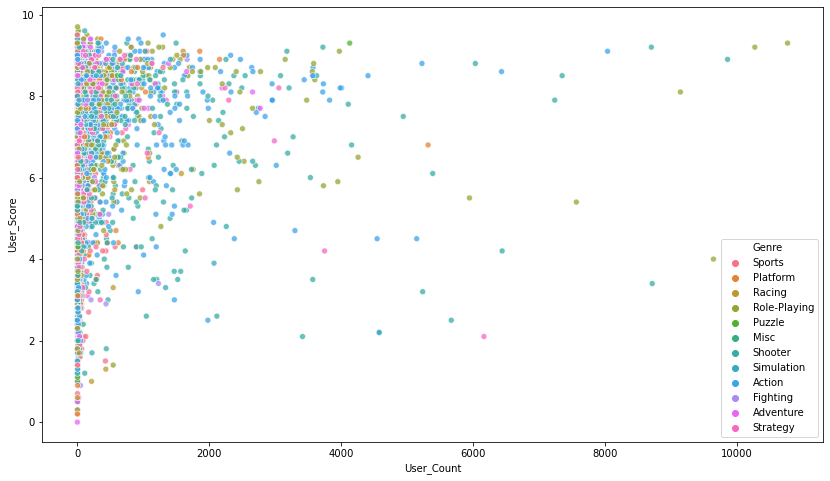

In [15]:
plt.figure(figsize = (14, 8))
sns.scatterplot(x='User_Count', y='User_Score', hue='Genre', data=df, alpha=0.75)
pass

Для обнаружения выбросов найдем квантиль для признака `User_Score`

In [16]:
df['User_Count'].quantile(0.955)

818.1349999999993

Как видно из данных и графика выше почти все знаения признака `User_Score` принимают значение меньше 818, удалим те строки таблицы, в которых признак `User_Score` выходят за пределы квантиля 0.955

In [17]:
d_drop = df[(df['User_Count'] > df['User_Count'].quantile(0.955))].index
df = df.drop(d_drop)
df.shape

(17065, 15)

### Обработка пропущенных значений

In [18]:
df.isna().sum()

Name                  0
Platform              0
Year_of_Release       8
Genre                 0
Publisher             1
NA_Sales              0
EU_Sales              0
JP_Sales              0
Other_Sales           0
Global_Sales          0
Critic_Score       9079
Critic_Count       9079
User_Score         9618
User_Count         9618
Rating             7162
dtype: int64

Мы видим что пропущенных значений в столбцах `Critic_Score`, `Critic_Count`, `User_Score`, `User_Count` больше 50%, поэтому нужно понять, как их обрабатывать.  
* Можно удалить строки с пропущенными значеними.  
* Удалить столбцы `Critic_Score`, `Critic_Count`, `User_Score`, `User_Count`.
* Заполнить медианными или средними значениями. 

Построим бокс-диаграммы для жанров игры и признаков Critic_Score, Critic_Count:

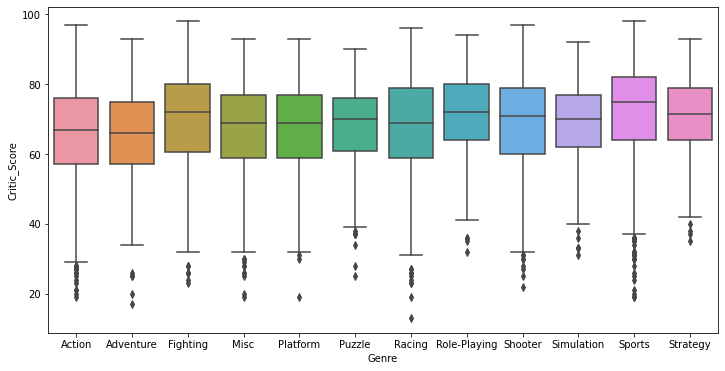

In [19]:
plt.figure(figsize = (12, 6))
sns.boxplot(x="Genre", y="Critic_Score", data=df)
pass


Игры в разных жанрах критики оценивают примерно одинаково.

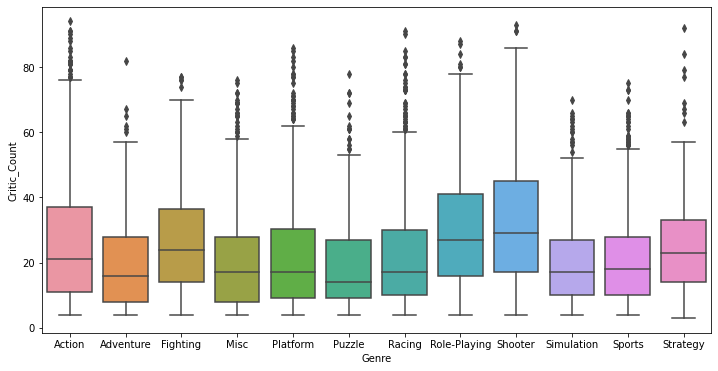

In [20]:
plt.figure(figsize = (12, 6))
sns.boxplot(x="Genre", y="Critic_Count", data=df)
pass

Мода количества оценок у игр в разных жанрах почти одинакова, выделяются, разве что, игры в жанрах Role-Playing и Shooter.

Построим бокс-диаграммы для жанров игры и признака User_Score:

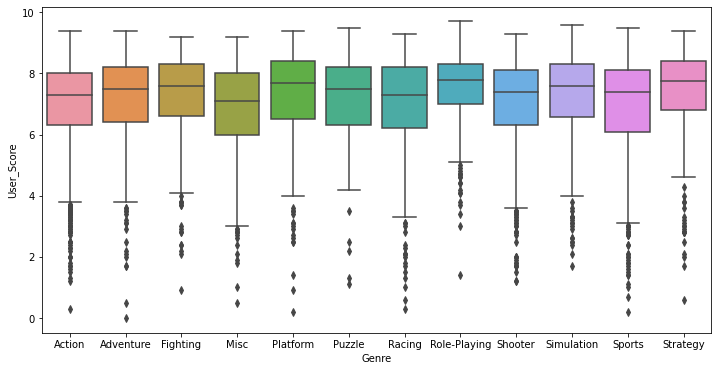

In [21]:
plt.figure(figsize = (12, 6))
sns.boxplot(x="Genre", y="User_Score", data=df)
pass

Игры в разных жанрах пользователи оценивают примерно одинаково.

Для обработки пропущенных знаений в столбцах `Year_of_Release`, `Critic_Score`, `Critic_Count`, `User_Score`, `User_Count`,  было принято решение заполнить их медианными значениями.

In [22]:
df.fillna(df.median(), inplace=True)

In [23]:
df.isna().sum()

Name                  0
Platform              0
Year_of_Release       0
Genre                 0
Publisher             1
NA_Sales              0
EU_Sales              0
JP_Sales              0
Other_Sales           0
Global_Sales          0
Critic_Score          0
Critic_Count          0
User_Score            0
User_Count            0
Rating             7162
dtype: int64

Заполним значения в столбцах `Rating` и `Publisher`:

Заполним пропущенные значения в столбце `Rating`, для этого введем новую категорию "NotRated".

In [24]:
df['Rating'] = df['Rating'].cat.add_categories('NotRated')

In [25]:
df['Rating'].fillna('NotRated', inplace=True)





Пропущенное значение в столбце `Publisher` заполним модой.

In [26]:
df['Publisher'].fillna(df['Publisher'].mode().iloc[0], inplace=True)


In [27]:
df.isna().sum()

Name               0
Platform           0
Year_of_Release    0
Genre              0
Publisher          0
NA_Sales           0
EU_Sales           0
JP_Sales           0
Other_Sales        0
Global_Sales       0
Critic_Score       0
Critic_Count       0
User_Score         0
User_Count         0
Rating             0
dtype: int64

### Визуализация и описательная статистика

Сводная информация о количественных признаках:

In [92]:
df.describe()

,Year_of_Release,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count
count,17065.000000,17065.000000,17065.000000,17065.000000,17065.000000,17065.000000,17065.000000,17065.000000,17065.000000,17065.000000
mean,2006.545268,0.232079,0.122625,0.073650,0.039450,0.468094,69.152066,22.803516,7.328304,43.648169
std,5.898636,0.746731,0.451036,0.301445,0.148555,1.415872,9.417793,12.097806,1.005433,87.289833
min,1976.000000,0.000000,0.000000,0.000000,0.000000,0.010000,13.000000,3.000000,0.000000,4.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,0.050000,70.000000,21.000000,7.500000,22.000000
50%,2007.000000,0.070000,0.020000,0.000000,0.010000,0.150000,70.000000,21.000000,7.500000,22.000000
75%,2010.000000,0.220000,0.090000,0.030000,0.030000,0.430000,70.000000,21.000000,7.500000,22.000000
max,2017.000000,41.360000,28.960000,10.220000,8.450000,82.540000,98.000000,94.000000,9.700000,818.000000


Информация о категориальных признаках:

In [93]:
df.describe(include=['category'])

,Platform,Genre,Publisher,Rating
count,17065,17065,17065,17065
unique,31,12,617,9
top,DS,Action,Electronic Arts,NotRated
freq,2250,3395,1337,7162


Построим диаграммы рассеивания для признака `Genre` и признаков `Critic_Score`, `Critic_Count`, `User_Score`, `User_Count`.

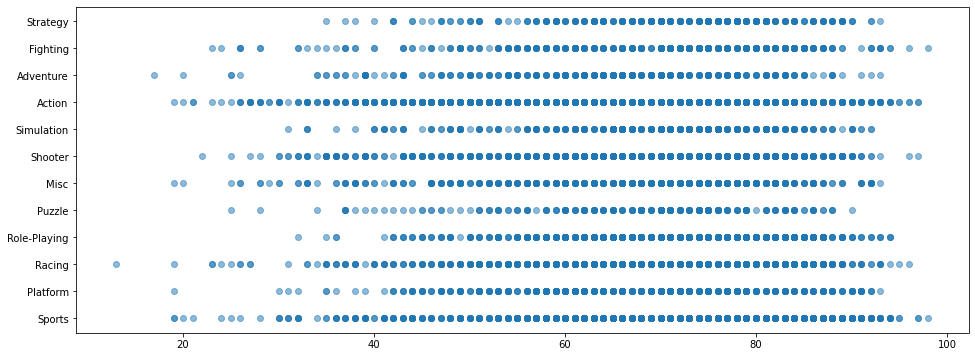

In [175]:
plt.figure(figsize = (16, 6))
plt.scatter(df['Critic_Score'], df['Genre'], alpha=0.5)
pass

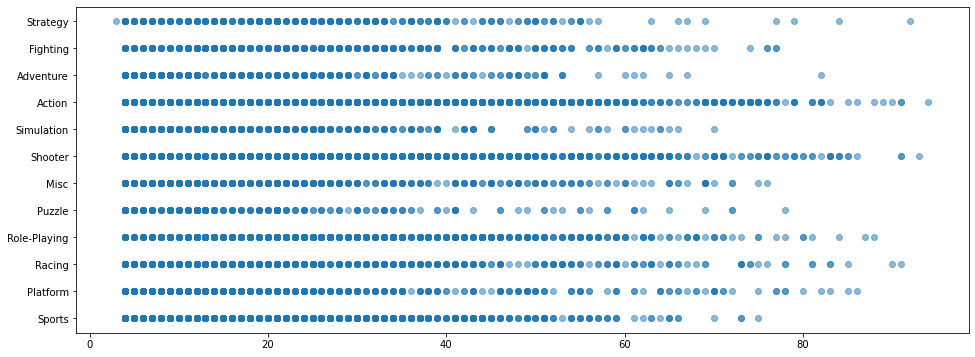

In [176]:
plt.figure(figsize = (16, 6))
plt.scatter(df['Critic_Count'], df['Genre'], alpha=0.5)
pass

Видно, что критики чаще оценивают игры в жанрах Action и Shooter, а игры в жанрах Simulation и Puzzle - реже. Малое количество оценок игр в жанре Puzzle может быть связно с нишевостью этого жанра.

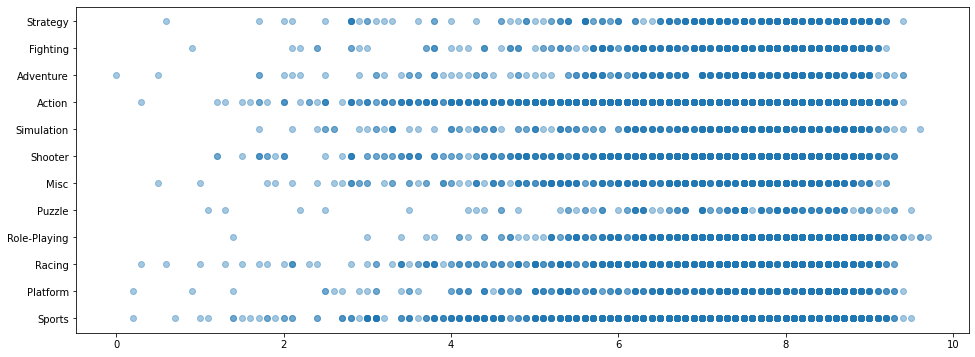

In [177]:
plt.figure(figsize = (16, 6))
plt.scatter(df['User_Score'], df['Genre'], alpha=0.4)
pass

У игр в жанре Puzzle заметно меньше низких оценок от пользователей, чем у игр в других жанрах. По моему мнению данный эффект опять же связан с нишевостью данного жанра, только фанаты этого жанра играют в эти игры и ставят им оценку.

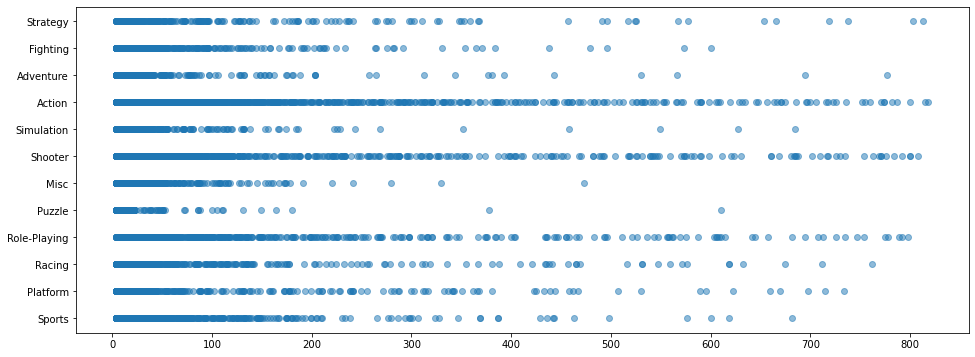

In [178]:
plt.figure(figsize = (16, 6))
plt.scatter(df['User_Count'], df['Genre'], alpha=0.5)
pass

Игры в жанрах Action и Shooter оценивают заметно чаще.

Распределение игр разных жанров:

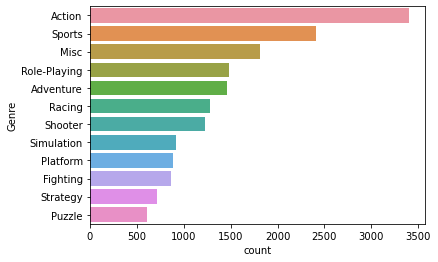

In [179]:
sns.countplot(y ='Genre', data=df, order = df['Genre'].value_counts().index)
pass

Видно, что игр в жанре Puzzle меньше, а наибольшее количество игр продано в жанрах Spotrs и Action, что неудивительно, спортивные игры выходят очень часто, а игры в жанре экшен представлены во множестве разновидностей от файтингов, шутеров и платформеров, поэтому очень чато игра позиционируется именно в жанре Action (К экшен-играм может быть отнесена любая игра, где победа над противником обеспечивается благодаря физическому превосходству, например, лучшим прицеливанием или меньшем временем реакции).

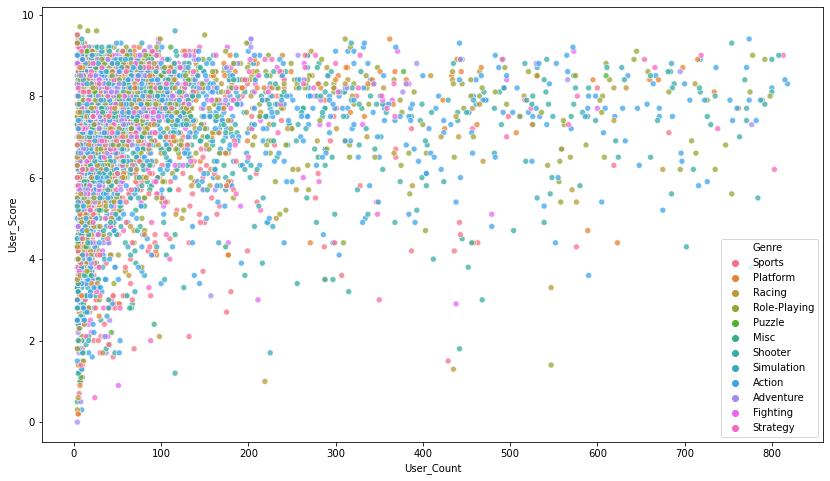

In [180]:
plt.figure(figsize = (14, 8))
sns.scatterplot(x='User_Count', y='User_Score', hue='Genre', data=df, alpha=0.75)
pass

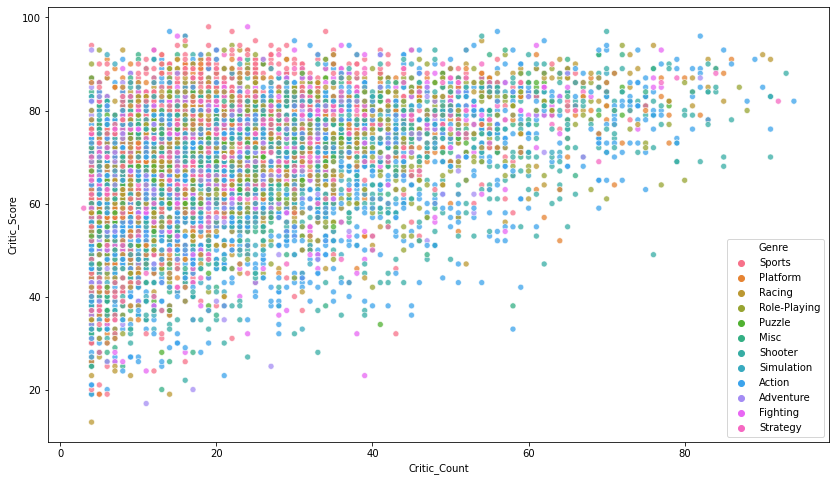

In [181]:
plt.figure(figsize = (14, 8))
sns.scatterplot(x='Critic_Count', y='Critic_Score', hue='Genre', data=df, alpha=0.75)
pass

На двух диаграммах выше видна зависимость количества оценивцших и поставленной оценкой.


Построим все возможные диаграммы рассеивания для каждой пары переменных:

In [182]:
np.random.seed(10)
random_subset = np.random.choice(np.arange(df.shape[0]), size=500, replace=False)

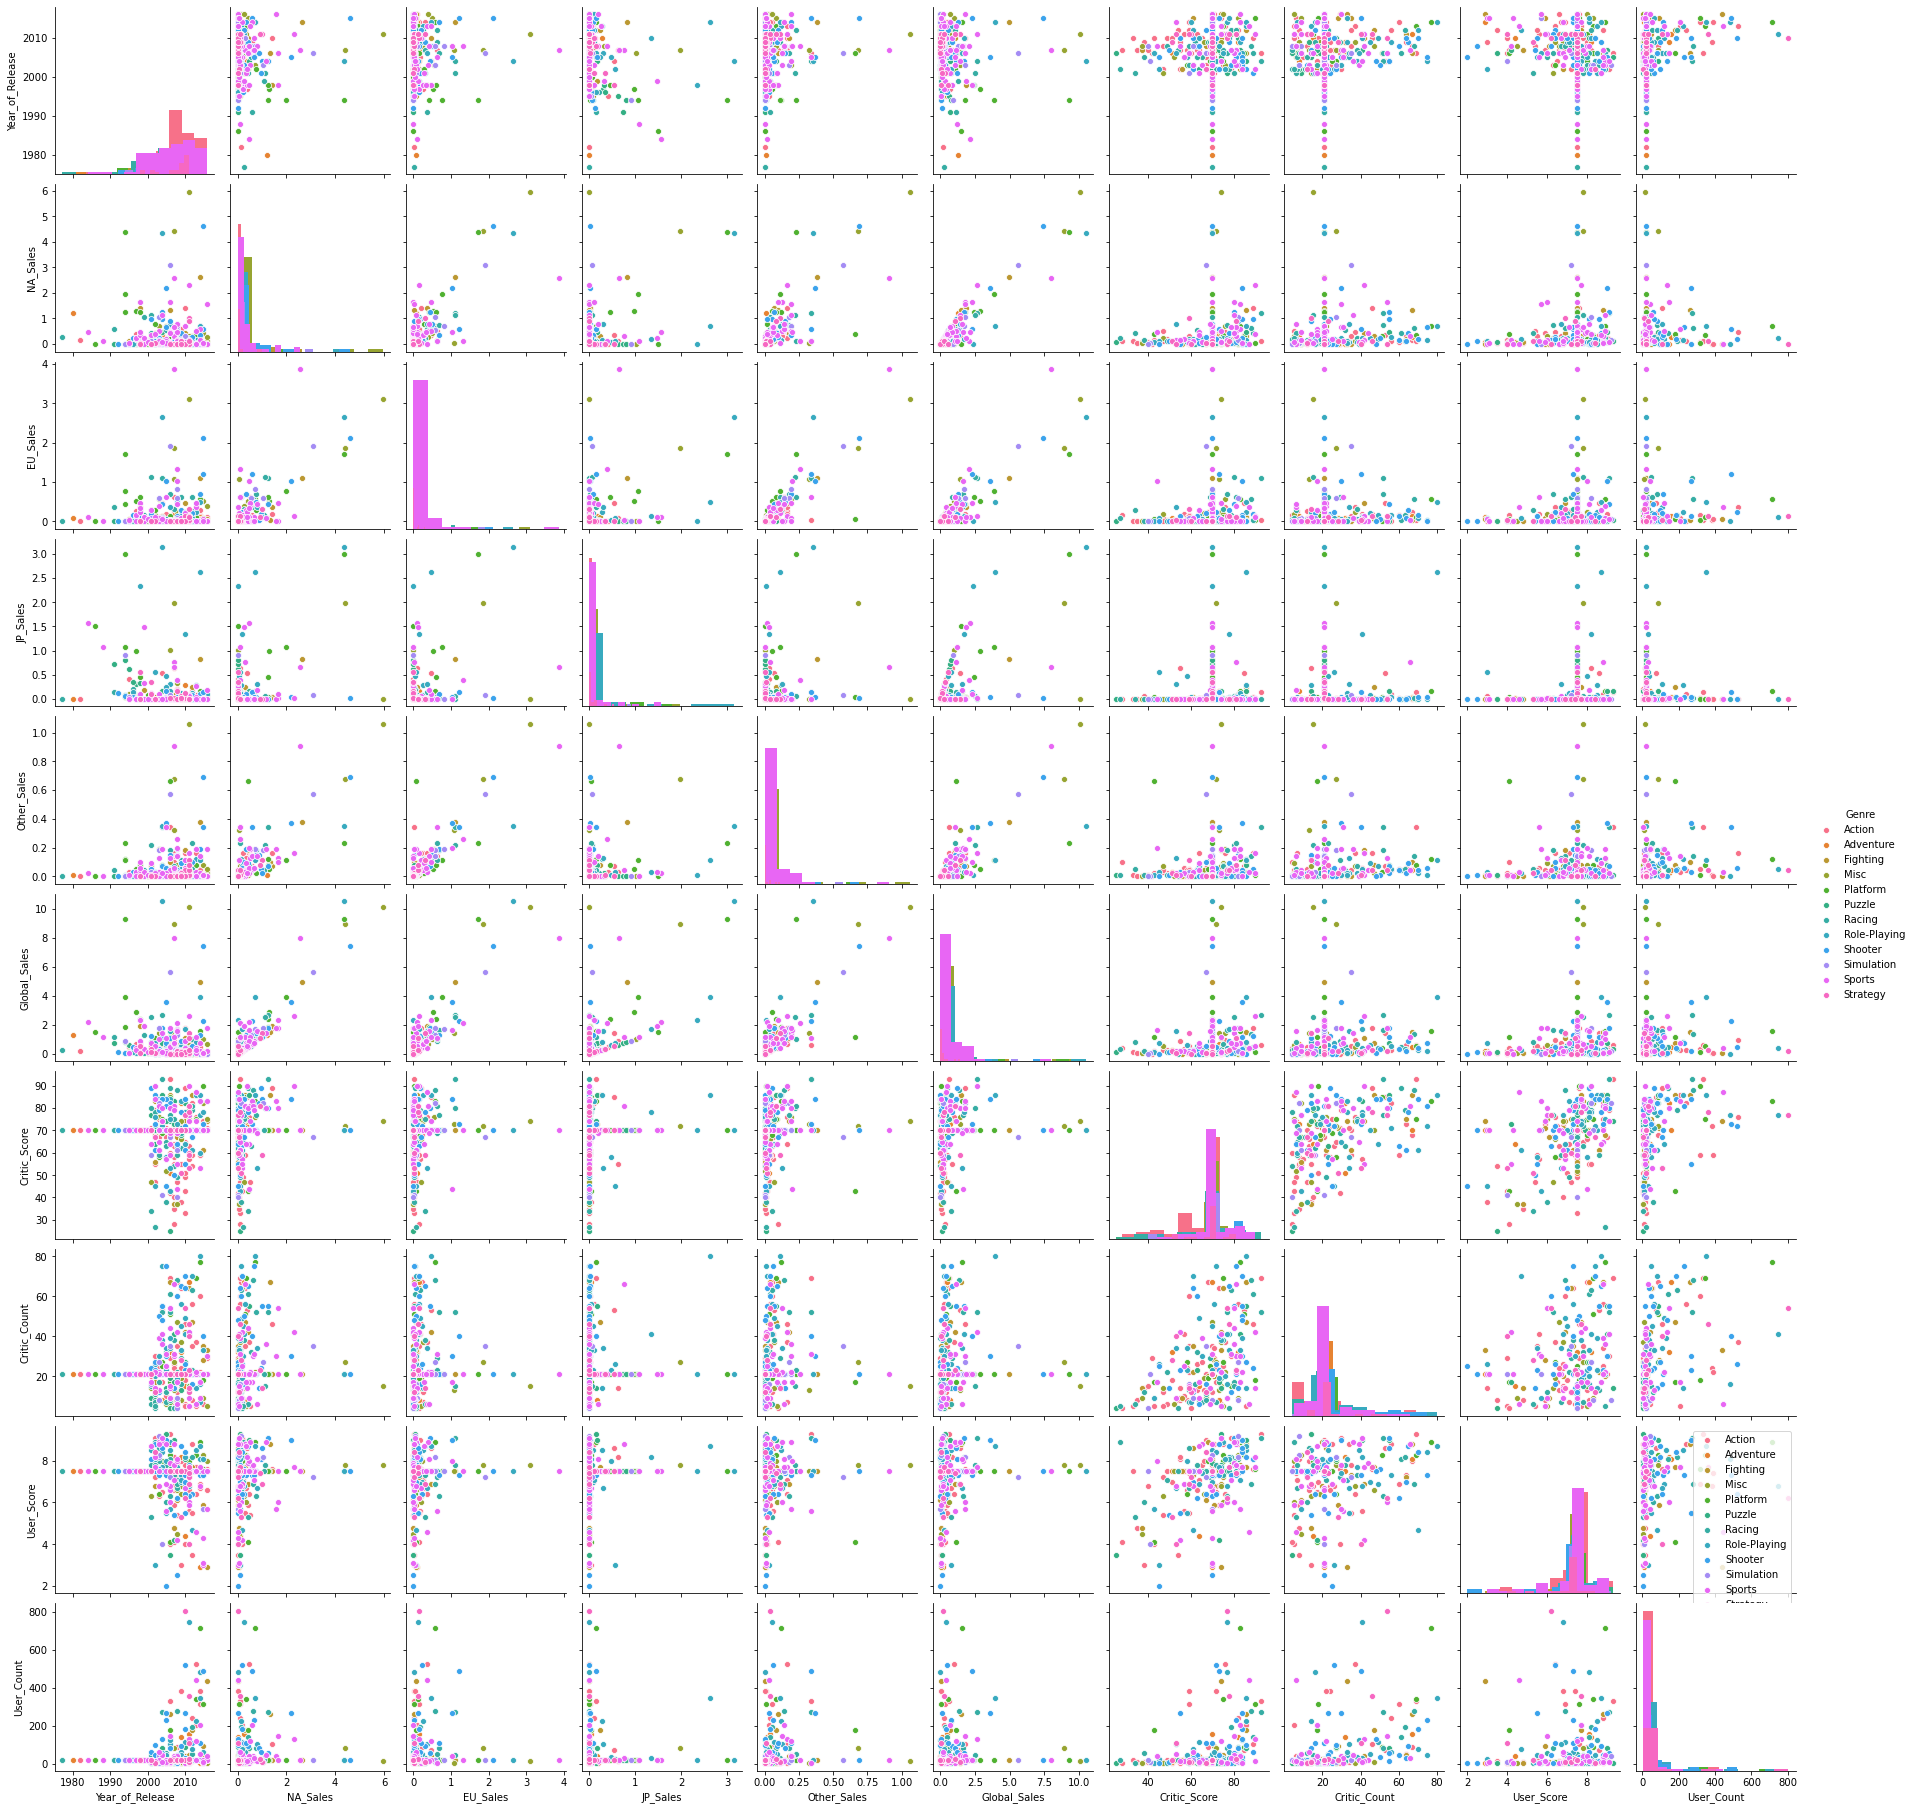

In [183]:
sns.pairplot(df.iloc[random_subset], hue='Genre', diag_kind='hist')
plt.legend()
pass

Тут мы наблюдаем корреляцию между продажами во всем мире и продажами в Северной Америке, Европе, и глобальными продажами, что неудивительно.

Диаграмма рассеивания для года издания игры и жанра в котором она была выпущена:

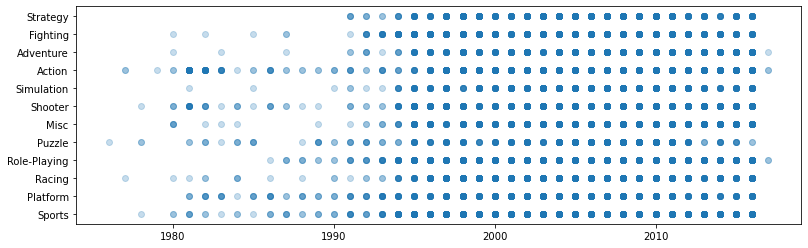

In [184]:
plt.figure(figsize = (13, 4))
plt.scatter(df['Year_of_Release'], df['Genre'], alpha=0.25)
pass

Диаграмма рассеивания для жанра игры и платформы на которй она была выпущена:

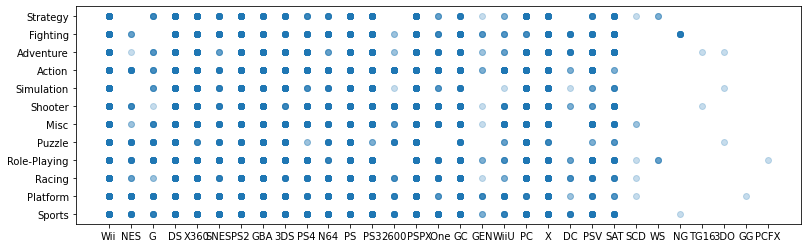

In [185]:
plt.figure(figsize = (13, 4))
plt.scatter(df['Platform'], df['Genre'], alpha=0.25)
pass

Для некоторых платформ не популярны игры в определенных жанрах или наоборот(например для XOne игры в жанре Puzzle, а для NG (Nokia N-Gage) продажи выше 100000 копий были только у файтингов и спортивных игр).

In [186]:
corr_mat = df.corr()
corr_mat

,Year_of_Release,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count
Year_of_Release,1.000000,-0.123273,-0.029352,-0.170616,0.014812,-0.109161,-0.020870,0.095043,-0.158063,0.157880
NA_Sales,-0.123273,1.000000,0.765565,0.469087,0.649975,0.939269,0.134853,0.175728,0.043782,0.183925
EU_Sales,-0.029352,0.765565,1.000000,0.462980,0.781358,0.902812,0.135510,0.192017,0.031491,0.229717
JP_Sales,-0.170616,0.469087,0.462980,1.000000,0.327398,0.642078,0.088151,0.088011,0.080141,0.082558
Other_Sales,0.014812,0.649975,0.781358,0.327398,1.000000,0.766247,0.137914,0.198935,0.026361,0.224469
Global_Sales,-0.109161,0.939269,0.902812,0.642078,0.766247,1.000000,0.147475,0.193391,0.052933,0.211249
Critic_Score,-0.020870,0.134853,0.135510,0.088151,0.137914,0.147475,1.000000,0.366329,0.487431,0.280162
Critic_Count,0.095043,0.175728,0.192017,0.088011,0.198935,0.193391,0.366329,1.000000,0.126827,0.490621
User_Score,-0.158063,0.043782,0.031491,0.080141,0.026361,0.052933,0.487431,0.126827,1.000000,0.027228
User_Count,0.157880,0.183925,0.229717,0.082558,0.224469,0.211249,0.280162,0.490621,0.027228,1.000000


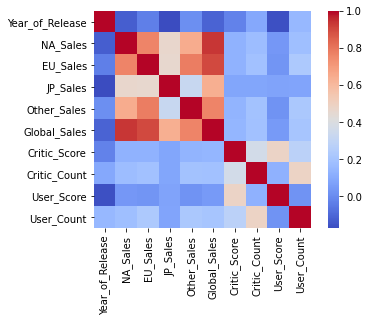

In [187]:
sns.heatmap(corr_mat, square=True, cmap='coolwarm')
pass

Видим, что существует корреляция между оценкой пользователей и критиков, количеством критиков и пользователей, поставивших оценку игре, а также, что продажи во всем мире и разных регионах коррелируют между собой.

### Бинаризация номинальных признаков

In [28]:
Genre_dummies_1 = pd.get_dummies(df['Publisher'])

In [29]:
Genre_dummies_2 = pd.get_dummies(df['Platform'])

In [30]:
Genre_dummies_3 = pd.get_dummies(df['Rating'])

In [31]:
df = pd.concat((df, Genre_dummies_1), axis=1)
df = df.drop(['Publisher'], axis=1)

In [32]:
df = pd.concat((df, Genre_dummies_2), axis=1)
df = df.drop(['Platform'], axis=1)

In [33]:
df = pd.concat((df, Genre_dummies_3), axis=1)
df = df.drop(['Rating'], axis=1)

In [34]:
df.head()

,Name,Year_of_Release,Genre,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,...,XOne,AO,E,E10+,EC,K-A,M,RP,T,NotRated
0,Wii Sports,2006.0,Sports,41.36,28.96,3.77,8.45,82.54,76.0,51.0,...,0,0,1,0,0,0,0,0,0,0
1,Super Mario Bros.,1985.0,Platform,29.08,3.58,6.81,0.77,40.24,70.0,21.0,...,0,0,0,0,0,0,0,0,0,1
2,Mario Kart Wii,2008.0,Racing,15.68,12.80,3.79,3.29,35.57,82.0,73.0,...,0,0,1,0,0,0,0,0,0,0
3,Wii Sports Resort,2009.0,Sports,15.61,10.95,3.28,2.95,32.78,80.0,73.0,...,0,0,1,0,0,0,0,0,0,0
4,Pokemon Red/Pokemon Blue,1996.0,Role-Playing,11.27,8.89,10.22,1.00,31.37,70.0,21.0,...,0,0,0,0,0,0,0,0,0,1


### Отбор признаков

Признак Name не несет никакой содержательной информации для решаемой задачи, поэтому его можно исключить из тренировочной и тестовой выборок.

In [35]:
df = df.drop('Name', axis = 1)

Так как данные о глобальных продажах коррелируют с данными о продажах в Северной Америке, Европе, Японии и других странах исключим их тоже:

In [36]:
df = df.drop('Global_Sales', axis = 1)

# Решение задачи классификации

### Нормализация признаков и разбиение на выборки

In [37]:
y = df['Genre']
X = df.drop('Genre', axis = 1)

In [38]:
print("x:", X.shape)
print("y:", y.shape)

x: (17065, 676)
y: (17065,)


In [39]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 10)

N_train, _ = X_train.shape 
N_test,  _ = X_test.shape 

print(N_train, N_test)

12798 4267


In [200]:
print(y_train.shape)
print(y_train.value_counts(),'\n')
print(y_test.shape)
print(y_test.value_counts())

(12798,)
Action          2592
Sports          1791
Misc            1356
Role-Playing    1115
Adventure       1098
Racing           963
Shooter          913
Simulation       713
Platform         657
Fighting         655
Strategy         513
Puzzle           432
Name: Genre, dtype: int64 

(4267,)
Action          803
Sports          614
Misc            457
Adventure       369
Role-Playing    363
Shooter         319
Racing          313
Platform        234
Simulation      206
Fighting        206
Strategy        201
Puzzle          182
Name: Genre, dtype: int64


In [60]:
sc = sklearn.preprocessing.StandardScaler()
X_train = sc.fit_transform(X_train)
X_test  = sc.transform(X_test)

In [61]:
X_test = pd.DataFrame(X_test)
X_test.describe()

,0,1,2,3,4,5,6,7,8,9,...,666,667,668,669,670,671,672,673,674,675
count,4267.000000,4267.000000,4267.000000,4267.000000,4267.000000,4267.000000,4267.000000,4267.000000,4267.000000,4.267000e+03,...,4267.000000,4.267000e+03,4267.000000,4267.000000,4267.000000,4267.000000,4267.000000,4267.000000,4267.000000,4267.000000
mean,-0.030742,0.018470,0.002089,0.027695,-0.005342,0.014919,0.017753,0.022823,0.006499,-1.531230e-02,...,-0.006539,-8.839871e-03,-0.003239,-0.017018,-0.013370,0.006247,-0.018145,0.044187,0.005046,0.018494
std,1.010787,1.383375,1.357938,1.003920,1.178228,0.986468,1.010890,0.972603,0.980392,1.093004e-16,...,0.973282,6.193689e-16,0.998145,0.974626,0.654756,1.224697,0.971596,2.449011,1.004438,1.003040
min,-5.030522,-0.339857,-0.298662,-0.237654,-0.279486,-5.303703,-1.637035,-6.937578,-0.450380,-1.531230e-02,...,-0.121772,-8.839871e-03,-0.562972,-0.307867,-0.023394,-0.012502,-0.296159,-0.008840,-0.458739,-0.846445
25%,-0.610399,-0.339857,-0.298662,-0.237654,-0.279486,0.093465,-0.145051,0.175326,-0.245173,-1.531230e-02,...,-0.121772,-8.839871e-03,-0.562972,-0.307867,-0.023394,-0.012502,-0.296159,-0.008840,-0.458739,-0.846445
50%,0.069620,-0.235955,-0.249865,-0.237654,-0.208979,0.093465,-0.145051,0.175326,-0.245173,-1.531230e-02,...,-0.121772,-8.839871e-03,-0.562972,-0.307867,-0.023394,-0.012502,-0.296159,-0.008840,-0.458739,-0.846445
75%,0.579634,-0.028153,-0.054678,-0.104820,-0.067967,0.093465,-0.145051,0.175326,-0.245173,-1.531230e-02,...,-0.121772,-8.839871e-03,-0.562972,-0.307867,-0.023394,-0.012502,-0.296159,-0.008840,-0.458739,1.181411
max,1.769667,61.050936,70.359091,18.558358,59.298410,3.056616,5.905774,2.151133,8.772536,-1.531230e-02,...,8.212095,-8.839871e-03,1.776287,3.248160,42.746763,79.987499,3.376561,113.123826,2.179888,1.181411


##### Классификатор kNN

In [203]:
from sklearn.neighbors import KNeighborsClassifier
neighbors_array = np.array([1,5,7,11,17,25])
for i in range (6):
    knn = KNeighborsClassifier(n_neighbors = neighbors_array[i])
    knn.fit(X_train, y_train)
    print('neighbours =',neighbors_array[i],'train accuracy =',knn.score(X_train, y_train),'test accuracy =',knn.score(X_test, y_test))

neighbours = 1 train accuracy = 0.9816377558993593 test accuracy = 0.3566908835247246
neighbours = 5 train accuracy = 0.5618846694796061 test accuracy = 0.3667682212327162
neighbours = 7 train accuracy = 0.5193780278168464 test accuracy = 0.3756737754862901
neighbours = 11 train accuracy = 0.4785904047507423 test accuracy = 0.37379892195922193
neighbours = 17 train accuracy = 0.44272542584778873 test accuracy = 0.37590813217717367
neighbours = 25 train accuracy = 0.41608063759962494 test accuracy = 0.36278415748769627


kNN метод показывает самую высокую точность на обучаещей выборке для 1 соседа. С увеличением количества соседей точность на обучающей выборке падает, а на тестовой самая высокая точность была достигнута при 17 соседях, а затем с увеличением количества соседей до 25 понизилась.

In [204]:
knn = KNeighborsClassifier(n_neighbors = 17)
knn.fit(X_train, y_train)
print(confusion_matrix(y_test, knn.predict(X_test), labels=["Action", "Sports", "Misc", "Role-Playing", "Adventure", "Racing",
                                                         "Shooter","Simulation","Platform","Fighting","Strategy","Puzzle"]))

[[440  88  62  30  43  13  34  17  26  29  14   7]
 [ 74 368  46  10  16  19  11  28  14   9  10   9]
 [ 93  62 145  27  15  15  11  41  13   8  11  16]
 [ 93  24  36 135  20   6   6   8   4  13  11   7]
 [ 82  28  34  21 134   9  16  19   7   4   6   9]
 [ 66  73  40   5   9  62   5   9  14   9  12   9]
 [107  49  19  11  11  19  64   5   9  13   8   4]
 [ 30  36  24  10   8   9   3  62   4   4  11   5]
 [ 66  28  26  10   9  14   8   3  50  14   2   4]
 [ 47  30   7  19  10   4  12   2   6  66   3   0]
 [ 44  23   9  25   9   7  13  10   2   7  47   5]
 [ 37  13  31   9   9   6   4  15  19   8   0  31]]


##### Random Forest

In [206]:
from sklearn.ensemble import RandomForestClassifier
trees_array = np.array([10,25,50,100,200])
for i in range (5):
    rfc = RandomForestClassifier(n_estimators = trees_array[i])
    rfc.fit(X_train, y_train)
    print('trees =',trees_array[i],'train accuracy =',rfc.score(X_train, y_train),'test accuracy =', rfc.score(X_test, y_test))


trees = 10 train accuracy = 0.9660884513205188 test accuracy = 0.38340754628544643
trees = 25 train accuracy = 0.981872167526176 test accuracy = 0.40543707522849776
trees = 50 train accuracy = 0.9827316768245038 test accuracy = 0.41106163580970234
trees = 100 train accuracy = 0.9829660884513205 test accuracy = 0.421607686899461
trees = 200 train accuracy = 0.9829660884513205 test accuracy = 0.42418561049917974


Метод RandomForest показа на тренировочной выборке точность в 98%, на тестовой выборке была достигнута точность $\approx$ 42.4%.
Видно, что классификатор очень хорошо предсказывает жанр на треноровочной выборке, но сильно хуже на тестовой, значит он переобучился, для борьбы с переобучением можно ограничить максимальную грубину дерева или уменьшить количество деревьев в лесу.

In [210]:
print(confusion_matrix(y_test, rfc.predict(X_test), labels=["Action", "Sports", "Misc", "Role-Playing", "Adventure", "Racing",
                                                         "Shooter","Simulation","Platform","Fighting","Strategy","Puzzle"]))

[[630  68  12  20  48   0  17   1   3   2   2   0]
 [139 399  30  14  21   2   0   4   2   2   1   0]
 [182  77 120  17  45   3   0   7   3   0   1   2]
 [169  18  14 101  45   0   6   0   5   0   5   0]
 [131  32  19  12 165   0   2   1   1   0   5   1]
 [133 122  13   4   8  24   0   2   2   0   2   3]
 [227  25   2   4  16   1  40   0   1   0   3   0]
 [ 67  41  28  13  13   0   1  34   0   1   4   4]
 [134  50   9  14   4   2   1   1  18   0   0   1]
 [128  12   4  19  17   0   2   0   0  23   1   0]
 [ 94  21   8  21  24   0   4   2   1   1  25   0]
 [ 55  54  30  18   8   1   0   4   7   0   0   5]]


Классификатор Random Forest приемущественно относит игру к одному из пяти самых популярных жанров.

### Выводы по 1 части

Метод kNN работал намного медленнее RF и показал меньшую точность.

kNN на тренировочной выборке для 1 соседа показал точность 98%, затем с увеличением количества соседей точность сильно падала. Точность близкая к 98% при использовании 1 соседа может говорить о том, что присутсвует достаточно много повторяющихся данных, которые относятся к разным классам.

### PCA

In [112]:
from sklearn.decomposition import PCA

sc = sklearn.preprocessing.StandardScaler()
X_standart = sc.fit_transform(X)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_standart)
X_pca = pd.DataFrame(X_pca, columns=['1 компонента','2 компонента'])

In [113]:
X.shape, X_pca.shape

((17065, 676), (17065, 2))

In [114]:
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size = 0.25, random_state = 10)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((12798, 2), (12798,), (4267, 2), (4267,))

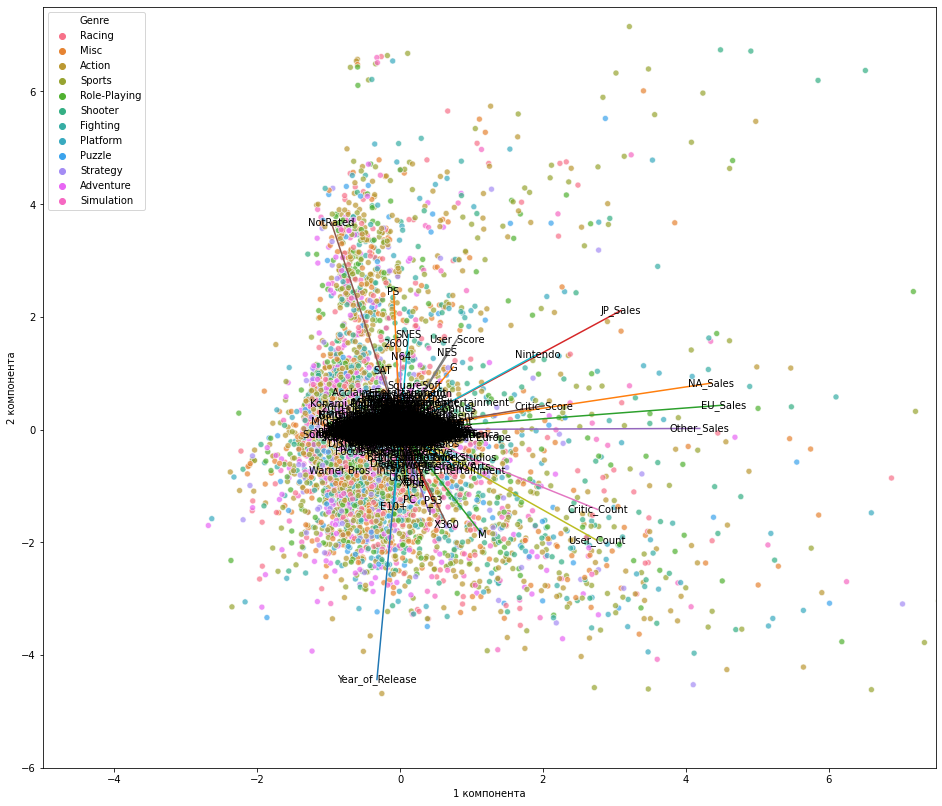

In [115]:
def biplot(X, y, coeff, labels):
    plt.figure(figsize=(16,14))
    draw = pd.concat([X_pca, y], axis=1, join='inner')
    np.random.seed(10)
    random_subset = np.random.choice(np.arange(draw.shape[0]), size=5000, replace=False)
    sns.scatterplot(data=draw.iloc[random_subset], x='1 компонента', y='2 компонента', hue='Genre', alpha=0.7)
    for i in range(0, len(coeff[0])):
        plt.text(coeff[0, i]*10, coeff[1, i]*10, labels[i], color='black', ha='center', va='center')
        plt.plot([0, coeff[0, i]*10], [0, coeff[1, i]*10])
    plt.ylim((-6,7.5))
    plt.xlim((-5,7.5))
    
    
biplot(X_pca, y, pca.components_, X.columns)

Как видно, наиболее важными признаками являются:
* Год издания (Year_of_Release)
* Продажи в Японии, Северной Америке, Европе и других странах (JP_Sales, NA_Sales, EU_Sales, Other_Sales)
* Количество критиков, поставивших оценку (Critic_Count)
* Количество пользователей, поставивших оценку (User_Count)

##### Random Forest

Применим классификатор Random Forest, так как он показывал более высокие результаты до применения PCA.

In [45]:
from sklearn.ensemble import RandomForestClassifier
trees_array = np.array([10,25,50,100,200])
for i in range (5):
    rfc = RandomForestClassifier(n_estimators = trees_array[i])
    rfc.fit(X_train, y_train)
    print('trees =',trees_array[i],'train accuracy =',rfc.score(X_train, y_train),'test accuracy =', rfc.score(X_test, y_test))

trees = 10 train accuracy = 0.9598374746054071 test accuracy = 0.16381532692758377
trees = 25 train accuracy = 0.9804656977652758 test accuracy = 0.17225216779939068
trees = 50 train accuracy = 0.9828879512423816 test accuracy = 0.18045465198031405
trees = 100 train accuracy = 0.9829660884513205 test accuracy = 0.17928286852589642
trees = 200 train accuracy = 0.9829660884513205 test accuracy = 0.1752988047808765


Отметим, что точность на тренировочной и тестововй выборках довольно сильно отличаются, что указывает на переобучение. Добавим параметр max_depth и посмотрим как изменятся результаты.

In [46]:
from sklearn.ensemble import RandomForestClassifier
trees_array = np.array([10,25,50,100,200])
for i in range (5):
    rfc = RandomForestClassifier(n_estimators = trees_array[i],max_depth=10)
    rfc.fit(X_train, y_train)
    print('trees =',trees_array[i],'train accuracy =',rfc.score(X_train, y_train),'test accuracy =', rfc.score(X_test, y_test))

trees = 10 train accuracy = 0.3884982028441944 test accuracy = 0.22334192641199907
trees = 25 train accuracy = 0.3932645725894671 test accuracy = 0.22615420670260136
trees = 50 train accuracy = 0.38482575402406627 test accuracy = 0.22873213030232012
trees = 100 train accuracy = 0.38005938427879354 test accuracy = 0.2294352003749707
trees = 200 train accuracy = 0.38404438193467727 test accuracy = 0.2359971877197094


Удалось повысить точность предсказания на тестовой выборке, за счет ограничения максимальной глубины дерева.

Видно, что применение PCA понижает точность предсказания, при использовнии двух компонент почти в два раза с $\approx$ 40% до $\approx$ 23.5%

In [59]:
print(confusion_matrix(y_test, rfc.predict(X_test), labels=["Action", "Sports", "Misc", "Role-Playing", "Adventure", "Racing",
                                                         "Shooter","Simulation","Platform","Fighting","Strategy","Puzzle"]))

[[533 122  40  17  49   4  23   6   3   4   0   2]
 [310 184  34  14  33  11   7   5   4  11   0   1]
 [229  79  65   6  40  12   8   8   4   4   0   2]
 [177  70  22  33  31   5  14   3   4   4   0   0]
 [164  55  27   4 106   4   5   2   0   2   0   0]
 [157  88  17   3  11  11  12   4   3   4   0   3]
 [203  59   6   5  10   4  26   0   4   2   0   0]
 [101  43  20   2  13   1   4  18   1   1   0   2]
 [108  47  23   8   9   8   7   1  21   2   0   0]
 [ 88  62   6   6  13   7   8   3   3  10   0   0]
 [107  49   3  10  21   2   4   1   0   4   0   0]
 [ 81  30  31   4  12   5   1   4  14   0   0   0]]


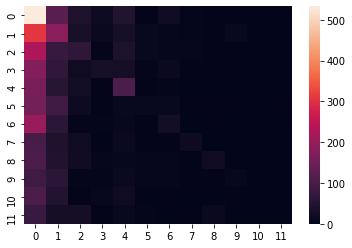

In [60]:
sns.heatmap(confusion_matrix(y_test, rfc.predict(X_test), labels=["Action", "Sports", "Misc", "Role-Playing", "Adventure", "Racing",
                                                         "Shooter","Simulation","Platform","Fighting","Strategy","Puzzle"]))
pass

#### PCA с различным числом компонент

Построим графики, показывающие ошибку на тестовой и обучающей выборке при использовании разного количества компонент:

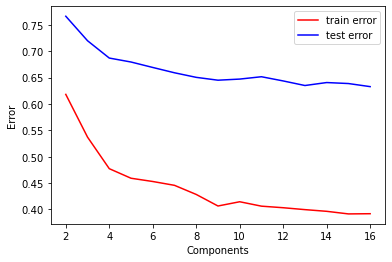

In [56]:
from sklearn.ensemble import RandomForestClassifier
test_error = []
train_error = []

pca_array = np.array([j+2 for j in range(15)])

for i in range(15):
    pca = PCA(n_components = pca_array[i])
    X_pca = pca.fit_transform(X_standart)
    X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.25, random_state=10)
    
    rfc = RandomForestClassifier(n_estimators = 200, max_depth=10)
    rfc.fit(X_train, y_train)
    
    test_error.append(1 - rfc.score(X_test, y_test))
    train_error.append(1 - rfc.score(X_train, y_train))

plt.plot(range(2,17), train_error, label="train error", color='red')
plt.plot(range(2,17), test_error, label="test error", color='blue')
plt.xlabel("Components")
plt.ylabel("Error")
plt.legend()
pass

Видна тенденция к уменьшению ошибки на тестовой  и тренировочной выборках, при увеличении числа используемых компонент

### LDA

In [124]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

sc = sklearn.preprocessing.StandardScaler()
X_standart = sc.fit_transform(X)

lda = LinearDiscriminantAnalysis(n_components = 2)
X_lda = lda.fit_transform(X_standart, y)
X_lda = pd.DataFrame(X_lda,columns = ['1 компонента','2 компонента'])

In [125]:
X.shape, X_lda.shape

((17065, 676), (17065, 2))

In [126]:
X_train, X_test, y_train, y_test = train_test_split(X_lda, y, test_size = 0.25, random_state = 10)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((12798, 2), (12798,), (4267, 2), (4267,))

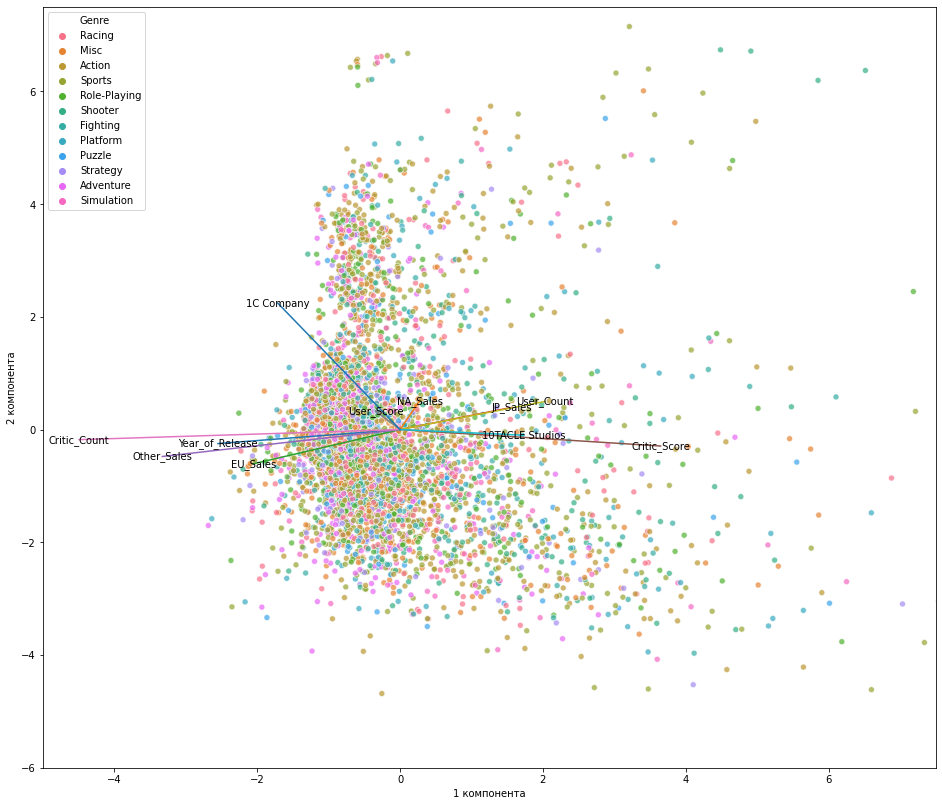

In [127]:
biplot(X_lda, y, lda.scalings_, X.columns)

Самыми важными признаками, при использовании LDA являются оценка критиков и количество критиков, оценивших игру. 

##### Random Forest

In [276]:
from sklearn.ensemble import RandomForestClassifier
trees_array = np.array([10,25,50,100,200])
for i in range (5):
    rfc = RandomForestClassifier(n_estimators = trees_array[i], max_depth=10)
    rfc.fit(X_train, y_train)
    print('trees =',trees_array[i],'train accuracy =',rfc.score(X_train, y_train),'test accuracy =', rfc.score(X_test, y_test))


trees = 10 train accuracy = 0.45233630254727303 test accuracy = 0.35387860323412235
trees = 25 train accuracy = 0.45889982809814034 test accuracy = 0.3571595969064917
trees = 50 train accuracy = 0.4506954211595562 test accuracy = 0.3609093039606281
trees = 100 train accuracy = 0.4567901234567901 test accuracy = 0.35973752050621044
trees = 200 train accuracy = 0.44944522581653384 test accuracy = 0.36231544410592925


In [160]:
rfc = RandomForestClassifier(n_estimators = 200, max_depth=10)
rfc.fit(X_train, y_train)
print(confusion_matrix(y_test, rfc.predict(X_test), labels=["Action", "Sports", "Misc", "Role-Playing", "Adventure", "Racing",
                                                         "Shooter","Simulation","Platform","Fighting","Strategy","Puzzle"]))

[[553  70  68  33  32  17  25   2   1   0   0   2]
 [ 98 377  81   2   6  30   3  13   0   0   0   4]
 [150  84 153  14  20   6   2  19   0   0   0   9]
 [159  16  37 119  19   1   9   1   0   0   1   1]
 [ 81  24  47  33 163   2   4   7   0   0   0   8]
 [ 81 149  37   0   1  37   2   3   0   1   0   2]
 [206  20  10   7   5  13  58   0   0   0   0   0]
 [ 69  46  40   2   7   1   0  36   0   0   0   5]
 [115  53  40   3   2  14   3   2   1   0   0   1]
 [150  10  12  16   2   4  11   0   0   1   0   0]
 [ 92  20  28  22  16   3   3   5   0   0  10   2]
 [ 40  39  61   4   4   5   0   9   0   0   0  20]]


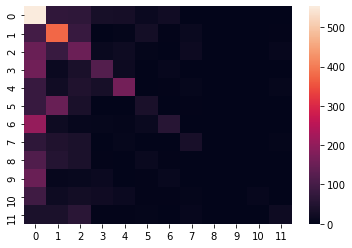

In [161]:
sns.heatmap(confusion_matrix(y_test, rfc.predict(X_test), labels=["Action", "Sports", "Misc", "Role-Playing", "Adventure", "Racing",
                                                         "Shooter","Simulation","Platform","Fighting","Strategy","Puzzle"]))
pass

Точность для Random Forest упала с 42.4% до 36.2%

##### kNN

In [277]:
from sklearn.neighbors import KNeighborsClassifier

neighbors_array = np.array([1,5,7,11,17,25])
for i in range (6):
    knn = KNeighborsClassifier(n_neighbors = neighbors_array[i])
    knn.fit(X_train, y_train)
    print('neighbours =',neighbors_array[i],'train accuracy =',knn.score(X_train, y_train),'test accuracy =',knn.score(X_test, y_test))

neighbours = 1 train accuracy = 0.9814814814814815 test accuracy = 0.26669791422545114
neighbours = 5 train accuracy = 0.49429598374746053 test accuracy = 0.3184907429107101
neighbours = 7 train accuracy = 0.46233786529145177 test accuracy = 0.3222404499648465
neighbours = 11 train accuracy = 0.4335833724019378 test accuracy = 0.3339582845090227
neighbours = 17 train accuracy = 0.40709485857165184 test accuracy = 0.35012889617998594
neighbours = 25 train accuracy = 0.39693702140959525 test accuracy = 0.3440356222170143


In [162]:
knn = KNeighborsClassifier(n_neighbors = 17)
knn.fit(X_train, y_train)
print(confusion_matrix(y_test, knn.predict(X_test), labels=["Action", "Sports", "Misc", "Role-Playing", "Adventure", "Racing",
                                                         "Shooter","Simulation","Platform","Fighting","Strategy","Puzzle"]))

[[476  69  70  41  44  15  39  11  13  17   6   2]
 [ 94 319  72   8  18  49   8  21  16   3   0   6]
 [134  58 136  17  30  15   4  25  12   5   2  19]
 [135   9  39 134  19   4   7   1   2   5   6   2]
 [ 67  15  35  39 174   2   6  12   2   3   5   9]
 [ 74  95  36   7   2  70   6   7   9   4   1   2]
 [166  18  16   6   7  16  75   3   3   9   0   0]
 [ 45  40  47   9  11   6   1  36   2   3   1   5]
 [ 91  31  32  10   5  21   8   7  17   6   0   6]
 [127  11   8  15   3   4  15   1   5  14   3   0]
 [ 76  19  15  25  22   5   8   9   2   2  14   4]
 [ 43  30  44   7  10   5   2  10   3   0   1  27]]


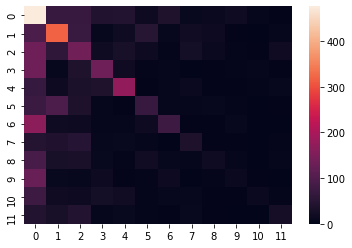

In [163]:
sns.heatmap(confusion_matrix(y_test, knn.predict(X_test), labels=["Action", "Sports", "Misc", "Role-Playing", "Adventure", "Racing",
                                                         "Shooter","Simulation","Platform","Fighting","Strategy","Puzzle"]))
pass

Точность ниже, чем до применения LDA на 1.5% (при 17 ближайших соседях).

### Выводы по 2 части:

LDA и PCA не помогли увеличить точность предсказания, можно сделать вывод, что сокращение размерности плохо работает для данной задачи. 

Применение LDA и PCA очень сильно уменьшило время обучения для kNN.